In [1]:
import numpy as np
from qiskit import *
%matplotlib inline

In [2]:
# create quantum circuit acting on register of 3 qubits
circ = QuantumCircuit(3)

In [3]:
# hadamard on qubit 0
circ.h(0)

# CX (CNOT) on qubits 0 and 1
circ.cx(0,1)

# CX on qubits 0 and 2
circ.cx(0,2)

In [5]:
circ.draw()

┌───┐          
q_0: ┤ H ├──■────■──
     └───┘┌─┴─┐  │  
q_1: ─────┤ X ├──┼──
          └───┘┌─┴─┐
q_2: ──────────┤ X ├
               └───┘

In [6]:
## Simulating circuits with Aer

In [7]:
from qiskit import Aer

In [9]:
# run quantum circuit on a statevector simulator backend
backend = Aer.get_backend('statevector_simulator')

In [10]:
# now we compile and run the quantum circuit

In [11]:
#create quantum program for execution
job = execute(circ, backend)

In [12]:
# some useful job/execute() methods
# job.status()
result = job.result()

In [13]:
outputstate = result.get_statevector(circ, decimals=3)
print(outputstate)

[0.707+0.j 0.   +0.j 0.   +0.j 0.   +0.j 0.   +0.j 0.   +0.j 0.   +0.j
 0.707+0.j]


In [14]:
# also some visualizations

In [15]:
from qiskit.visualization import plot_state_city

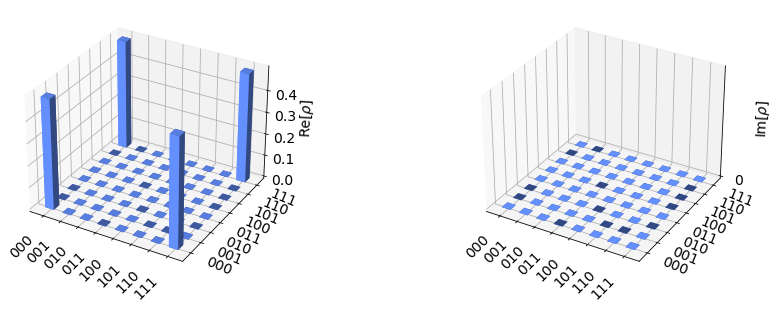

In [16]:
plot_state_city(outputstate)

In [17]:
# run quantum circuit on a unitary simulator backend
backend = Aer.get_backend('unitary_simulator')
job = execute(circ, backend)
result = job.result()

# show results
print(result.get_unitary(circ,decimals=3))

[[ 0.707+0.j  0.707-0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j
   0.   +0.j  0.   +0.j]
 [ 0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j
   0.707+0.j -0.707+0.j]
 [ 0.   +0.j  0.   +0.j  0.707+0.j  0.707-0.j  0.   +0.j  0.   +0.j
   0.   +0.j  0.   +0.j]
 [ 0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.707+0.j -0.707+0.j
   0.   +0.j  0.   +0.j]
 [ 0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.707+0.j  0.707-0.j
   0.   +0.j  0.   +0.j]
 [ 0.   +0.j  0.   +0.j  0.707+0.j -0.707+0.j  0.   +0.j  0.   +0.j
   0.   +0.j  0.   +0.j]
 [ 0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j
   0.707+0.j  0.707-0.j]
 [ 0.707+0.j -0.707+0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j
   0.   +0.j  0.   +0.j]]


In [18]:
# simulating a circuit with measurements
# create the circuit
meas = QuantumCircuit(3,3)
meas.barrier(range(3))

# map quantum measurement to the classical bits
meas.measure(range(3),range(3))

In [21]:
qc = circ + meas

qc.draw()

<ipython-input-21-5099699ad883>:1: DeprecationWarning: The QuantumCircuit.__add__() method is being deprecated.Use the compose() method which is more flexible w.r.t circuit register compatibility.
  qc = circ + meas
C:\ProgramData\Anaconda3\lib\site-packages\qiskit\circuit\quantumcircuit.py:869: DeprecationWarning: The QuantumCircuit.combine() method is being deprecated. Use the compose() method which is more flexible w.r.t circuit register compatibility.
  return self.combine(rhs)


┌───┐           ░ ┌─┐      
q_0: ┤ H ├──■────■───░─┤M├──────
     └───┘┌─┴─┐  │   ░ └╥┘┌─┐   
q_1: ─────┤ X ├──┼───░──╫─┤M├───
          └───┘┌─┴─┐ ░  ║ └╥┘┌─┐
q_2: ──────────┤ X ├─░──╫──╫─┤M├
               └───┘ ░  ║  ║ └╥┘
c: 3/═══════════════════╩══╩══╩═
                        0  1  2

In [22]:
#now with qasm
backend_sim = Aer.get_backend('qasm_simulator')

#execute the circuit and grab the job results
job_sim = execute(qc, backend_sim,shots=1024)
result_sim = job_sim.result()

In [23]:
counts = result_sim.get_counts(qc)
counts

{'000': 520, '111': 504}